In [18]:
import pandas as pd
import json
import pathlib
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from helper.display_cluster import faceId_to_ogId

In [6]:
reference_clusters_path = pathlib.Path("../reference_clusters")

df_stats = pd.DataFrame(
        columns=["cluster_ref_id", "n_images"]
    )

ids_set = set()

for file in reference_clusters_path.glob("*.json"):

    cluster_id = file.stem.split("_")[-1]

    with open(file, "r") as f:
        ids = json.load(f)
    
    og_ids = [faceId_to_ogId(id) for id in ids]
    ids_set.update(og_ids)

    length = len(ids)

    df_stats = pd.concat(
        [
            df_stats,
            pd.DataFrame(
                [[cluster_id, length]],
                columns=[
                    "cluster_ref_id",
                    "n_images"
                ],
            ),
        ]
    )

In [9]:
print("Number of images", len(ids_set))

Number of images 961


In [12]:
print("Number of faces", df_stats["n_images"].sum())

Number of faces 1036


In [15]:
print("Number of indentities", df_stats["cluster_ref_id"].nunique())

Number of indentities 74


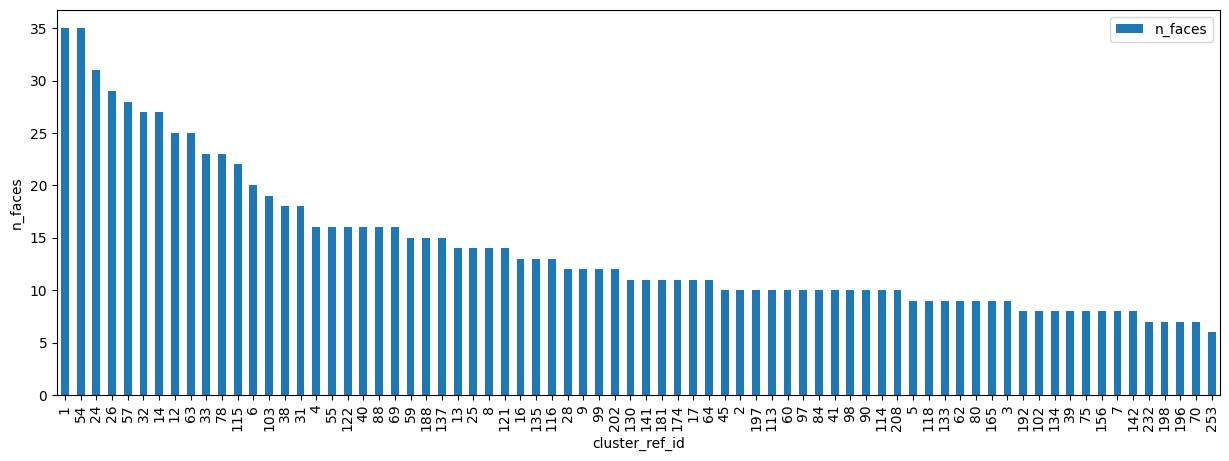

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
df_stats.sort_values("n_images", ascending=False).plot.bar(x="cluster_ref_id", y="n_images", ax=ax)

# x axis label
ax.set_xlabel("cluster_ref_id")
# y axis label
ax.set_ylabel("n_faces")

# change legend
ax.legend(["n_faces"])

plt.show()